In [1]:
import pandas as pd
df = pd.read_csv("final_data.csv")

In [2]:
df = pd.DataFrame(df)
df.head()


,review,sentiment
0,go,0
1,fuck,1
2,sleep,0
3,adam,0
4,mansbach,0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

Using TensorFlow backend.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 2 columns):
review       232 non-null object
sentiment    232 non-null int64
dtypes: int64(1), object(1)
memory usage: 3.7+ KB


Text(0.5, 1.0, 'Number of words')

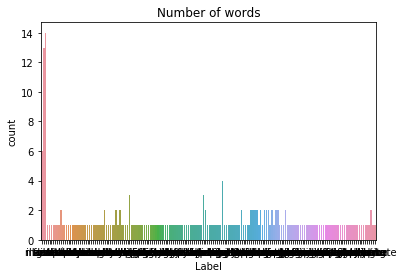

In [5]:
sns.countplot(df.review)
plt.xlabel('Label')
plt.title('Number of words')

In [6]:
X = df.review
Y = df.sentiment
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [7]:
##Split into training and test data.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [8]:
##Process the Data

max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [9]:
# Define RNN

def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model


In [10]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)  

In [11]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Instructions for updating:
Use tf.cast instead.
Train on 157 samples, validate on 40 samples
Epoch 1/10
157/157 [==============================] - 3s 19ms/step - loss: 0.6872 - acc: 0.4904 - val_loss: 0.6415 - val_acc: 0.7500
Epoch 2/10
157/157 [==============================] - 1s 3ms/step - loss: 0.6234 - acc: 0.7834 - val_loss: 0.5625 - val_acc: 0.7500
Epoch 3/10
157/157 [==============================] - 1s 3ms/step - loss: 0.5891 - acc: 0.7834 - val_loss: 0.5671 - val_acc: 0.7500


In [12]:
#Process the test set data.

test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [18]:
#Evaluate the model on the test set.

accr = model.evaluate(test_sequences_matrix,Y_test)

35/35 [==============================] - 0s 912us/step


In [19]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.672
  Accuracy: 0.629
